# Finding Mean and Median Rent per Tract
## Also looking at average square foot or average rooms

In [1]:
import pandas as pd
import geopandas as gpd

joined = pd.read_csv('data/JOINED_CENSUS_LISTINGS_MAY_27.csv')
joined.head()

,Unnamed: 0,index_left,posted,neighborhood,post title,number bedrooms,sqft,URL,price,latlon,...,EducProf,EducDoct,PctNHW,PctBlackAA,PctAsian,pctPOC,PctBachelor,PctMasters,PctDoctorate,geometry
0,0,1526.0,2022-05-23 18:03,(Marina del Rey),"Pristine 3Bd, 2 Ba Townhouse In Marina Del Rey...",3.0,1500.0,https://losangeles.craigslist.org/wst/apa/d/ma...,"6,500","['33.976661', '-118.462111']",...,411.0,247.0,77.964519,2.054155,8.216620,22.035481,34.970946,27.284733,6.524036,POINT (-118.462111 33.976661)
1,0,2020.0,2022-05-23 09:47,(Marina del Rey),3 Bedroom Furnished Marina del Rey Peninsula/V...,3.0,1850.0,https://losangeles.craigslist.org/wst/apa/d/ve...,"7,200","['33.976739', '-118.462411']",...,411.0,247.0,77.964519,2.054155,8.216620,22.035481,34.970946,27.284733,6.524036,POINT (-118.462411 33.976739)
2,0,2647.0,2022-05-21 13:45,(Marina Del Rey),Marina del Rey Beach Furnished 3 bedroom 3 bat...,3.0,1800.0,https://losangeles.craigslist.org/wst/apa/d/ve...,"6,995","['33.979506', '-118.464868']",...,411.0,247.0,77.964519,2.054155,8.216620,22.035481,34.970946,27.284733,6.524036,POINT (-118.464868 33.979506)
3,1,47.0,2022-05-25 12:16,(Venice Beach),Recently Updated 3 Bedroom 2 Bath Quiet Walk S...,3.0,1400.0,https://losangeles.craigslist.org/wst/apa/d/ve...,"5,500","['33.980825', '-118.467207']",...,258.0,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,POINT (-118.467207 33.980825)
4,1,48.0,2022-05-25 12:15,(Venice Beach),Recently Updated 3 Bedroom 2 Bath Quiet Walk S...,3.0,1400.0,https://losangeles.craigslist.org/wst/apa/d/ve...,"5,500","['33.980825', '-118.467207']",...,258.0,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,POINT (-118.467207 33.980825)


In [2]:
df1=pd.read_csv('Data/la_apts_SFV_geometry_May27.csv')
df2=pd.read_csv('Data/wst_5-25_geometry.csv')
df3=pd.read_csv('Data/lac_5-23_latlong.csv')
df4=pd.read_csv('Data/sgv_latlong.csv')
df5=pd.read_csv('Data/lgb_latlong.csv')

In [3]:
df1['x']=df1['x']*-1

In [4]:
df=pd.concat([df1, df2, df3, df4, df5])

In [5]:
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13525 entries, 0 to 2338
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posted           13525 non-null  object 
 1   neighborhood     13525 non-null  object 
 2   post title       13525 non-null  object 
 3   number bedrooms  11331 non-null  float64
 4   sqft             11295 non-null  float64
 5   URL              13525 non-null  object 
 6   price            13270 non-null  object 
 7   latlon           13525 non-null  object 
 8   y                13525 non-null  float64
 9   x                13525 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


In [7]:
df.to_csv('Data/updated_joins_MAY_28.csv')

In [8]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y))

In [9]:
la=gpd.read_file('Data/lacounty_clipped.geojson')

In [10]:
#joining to clipped la county geojson file so that only the listings in 
#Los Angeles city boundaries are kept
geojoin=gpd.sjoin(gdf.set_crs(epsg=4326),la,how='right', predicate='intersects')

In [11]:
geojoin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7551 entries, 0 to 1148
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index_left       6902 non-null   float64 
 1   posted           6902 non-null   object  
 2   neighborhood     6902 non-null   object  
 3   post title       6902 non-null   object  
 4   number bedrooms  5506 non-null   float64 
 5   sqft             5633 non-null   float64 
 6   URL              6902 non-null   object  
 7   price            6784 non-null   object  
 8   latlon           6902 non-null   object  
 9   y                6902 non-null   float64 
 10  x                6902 non-null   float64 
 11  GEOID            7551 non-null   object  
 12  TotalPop         7551 non-null   float64 
 13  WhitePop         7551 non-null   float64 
 14  BlackorAA        7551 non-null   float64 
 15  AmInd_AKnative   7551 non-null   float64 
 16  Asian            7551 non-null   f

<AxesSubplot:>

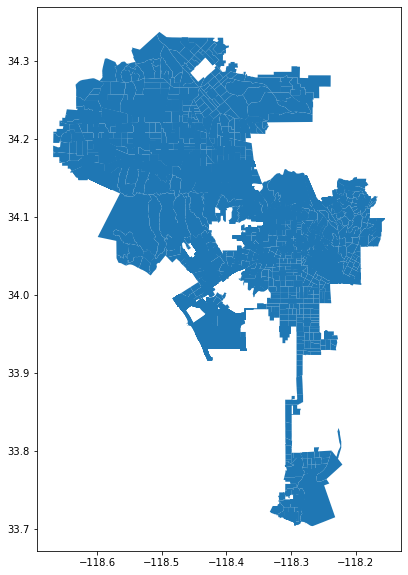

In [12]:
#checking to make sure it looks right
geojoin.plot(figsize=(10,10))

In [13]:
geojoin.to_file("Data/polygon_joined.geojson", driver='GeoJSON')

/Users/Nicole.lynn/opt/anaconda3/envs/UDS/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [14]:
#getting count of how many listings in each census tract
count = geojoin.groupby('GEOID').count()['post title']

In [15]:
count.info()

<class 'pandas.core.series.Series'>
Index: 1149 entries, 06037101110 to 06037980031
Series name: post title
Non-Null Count  Dtype
--------------  -----
1149 non-null   int64
dtypes: int64(1)
memory usage: 18.0+ KB


In [16]:
#listing from biggest to smallest
listing_count= count.sort_values(ascending=False)

In [17]:
listing_count.name= 'listing_count'

In [18]:
listing_count= pd.DataFrame(listing_count)

In [19]:
listing_count.head()

,listing_count
GEOID,
06037207102,243
06037207710,172
06037123301,166
06037265510,160
06037265202,159


In [20]:
listing_count.describe()

,listing_count
count,1149.000000
mean,6.006963
std,17.958672
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,243.000000


In [21]:
#only keeping the census tracts that have more than 5 listings
listing_count2 = listing_count[listing_count['listing_count']>=5]

In [22]:
listing_count2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 06037207102 to 06037123902
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   listing_count  243 non-null    int64
dtypes: int64(1)
memory usage: 3.8+ KB


In [23]:
listing_count2.describe()

,listing_count
count,243.000000
mean,26.493827
std,31.495686
min,5.000000
25%,9.000000
50%,15.000000
75%,32.000000
max,243.000000


In [24]:
#reading in the permit data from Allie's notebook! Then I can just join my data to her notebook and create the
#Grand notebook
permits= gpd.read_file('Data/CensusPlusPermits.geojson')

In [25]:
permits.head()

,GEOID,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,Hawaiian_PI,Other,EducTotal,Median HHI,...,EducDoct,PctNHW,PctBlackAA,PctAsian,pctPOC,PctBachelor,PctMasters,PctDoctorate,permit_count,geometry
0,06037274202,4284.0,3340.0,88.0,0.0,352.0,0.0,382.0,3786.0,128766.0,...,247.0,77.964519,2.054155,8.216620,22.035481,34.970946,27.284733,6.524036,8.0,"POLYGON ((-118.46683 33.97905, -118.46654 33.9..."
1,06037273902,4221.0,3707.0,76.0,13.0,162.0,0.0,36.0,3601.0,144924.0,...,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,48.0,"POLYGON ((-118.47136 33.98425, -118.47106 33.9..."
2,06037273502,2861.0,2384.0,207.0,18.0,58.0,0.0,45.0,2487.0,90161.0,...,58.0,83.327508,7.235232,2.027263,16.672492,44.873341,21.431444,2.332127,28.0,"POLYGON ((-118.47671 33.98745, -118.47504 33.9..."
3,06037273402,2641.0,2432.0,157.0,0.0,5.0,0.0,12.0,2386.0,72258.0,...,98.0,92.086331,5.944718,0.189322,7.913669,40.067058,23.470243,4.107293,21.0,"POLYGON ((-118.48334 33.99551, -118.48217 33.9..."
4,06037273300,2915.0,2085.0,446.0,0.0,70.0,0.0,223.0,2297.0,71823.0,...,46.0,71.526587,15.300172,2.401372,28.473413,47.757945,13.757074,2.002612,54.0,"POLYGON ((-118.47838 33.99813, -118.47816 33.9..."


In [26]:
# I want to check houw many have NAN's in the price
geojoin.price.isna().sum()

767

In [27]:
# need to take out the commas so I can get the mean
geojoin['price'] = geojoin['price'].str.replace(',','')

In [28]:
#changing it to numeric
geojoin['price']= geojoin['price'].apply(pd.to_numeric, errors='coerce')

In [29]:
#making sure I didn't make any new NANs
geojoin.price.isna().sum()

767

In [30]:
#getting the average price per tract
avg_price= geojoin.groupby('GEOID').mean()['price']

In [31]:
avg_price.isna().sum()

663

In [32]:
print(len(avg_price))

1149


In [33]:
# now I'm getting the median price of each census tract
med_price = geojoin.groupby('GEOID').median()['price']

In [34]:
#joining the average price to the count data frame I made
newdf= listing_count2.join(avg_price)

In [35]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 06037207102 to 06037123902
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_count  243 non-null    int64  
 1   price          243 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.8+ KB


In [36]:
#renaming the columns so that I know what they mean
newdf.columns=['listing_count','avg price']

In [37]:
#Joining the median price data to the dataframe
newdf= newdf.join(med_price)

In [38]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 06037207102 to 06037123902
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_count  243 non-null    int64  
 1   avg price      243 non-null    float64
 2   price          243 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.7+ KB


In [39]:
#renaming the columns
newdf.columns=['listing_count','avg price','med price']

In [40]:
newdf.head()

,listing_count,avg price,med price
GEOID,,,
06037207102,243,2631.860082,2609.0
06037207710,172,2892.890244,2823.5
06037123301,166,2335.268293,1852.0
06037265510,160,3173.300000,2850.0
06037265202,159,3645.685535,3595.0


In [41]:
permits.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   GEOID           1149 non-null   object  
 1   TotalPop        1149 non-null   float64 
 2   WhitePop        1149 non-null   float64 
 3   BlackorAA       1149 non-null   float64 
 4   AmInd_AKnative  1149 non-null   float64 
 5   Asian           1149 non-null   float64 
 6   Hawaiian_PI     1149 non-null   float64 
 7   Other           1149 non-null   float64 
 8   EducTotal       1149 non-null   float64 
 9   Median HHI      1133 non-null   float64 
 10  NAME            1149 non-null   object  
 11  state           1149 non-null   object  
 12  county          1149 non-null   object  
 13  tract           1149 non-null   object  
 14  EducBachelor    1149 non-null   float64 
 15  EducMasters     1149 non-null   float64 
 16  EducProf        1149 non-null   float64 
 17  EducDo

In [42]:
#Now I'm going to try to do square foot
geojoin.sqft.describe()

count     5633.00000
mean       851.07314
std        798.63148
min          1.00000
25%        600.00000
50%        765.00000
75%       1000.00000
max      50002.00000
Name: sqft, dtype: float64

In [43]:
#getting the average squarefoot for listings in each census tract
avg_sqft = geojoin.groupby('GEOID').mean()['sqft']

In [44]:
avg_sqft.info()

<class 'pandas.core.series.Series'>
Index: 1149 entries, 06037101110 to 06037980031
Series name: sqft
Non-Null Count  Dtype  
--------------  -----  
427 non-null    float64
dtypes: float64(1)
memory usage: 18.0+ KB


In [45]:
#getting the median square foot
med_sqft = geojoin.groupby('GEOID').median()['sqft']

In [46]:
#joining the average squarefoot to the dataframe
newdf= newdf.join(avg_sqft)

In [47]:
#adding the median squarefoot to the dataframe
newdf= newdf.join(med_sqft, rsuffix='_med')

In [48]:
newdf.head()

,listing_count,avg price,med price,sqft,sqft_med
GEOID,,,,,
06037207102,243,2631.860082,2609.0,822.586777,842.0
06037207710,172,2892.890244,2823.5,876.868750,814.5
06037123301,166,2335.268293,1852.0,659.007299,575.0
06037265510,160,3173.300000,2850.0,681.060606,500.0
06037265202,159,3645.685535,3595.0,752.554545,712.5


In [49]:
#renaming the columns
newdf.columns=['listing count','avg price','med price','avg sqft','med sqft']

In [50]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 06037207102 to 06037123902
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing count  243 non-null    int64  
 1   avg price      243 non-null    float64
 2   med price      243 non-null    float64
 3   avg sqft       232 non-null    float64
 4   med sqft       232 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.5+ KB


In [51]:
#making the grand data frame! I'm joining the permits data to my dataframe so that we only keep the census tracts
#that have more than five listings
grand_db = newdf.join(permits.set_index('GEOID'))

In [52]:
grand_db.head()

,listing count,avg price,med price,avg sqft,med sqft,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,...,EducDoct,PctNHW,PctBlackAA,PctAsian,pctPOC,PctBachelor,PctMasters,PctDoctorate,permit_count,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
06037207102,243,2631.860082,2609.0,822.586777,842.0,2926.0,323.0,220.0,74.0,1695.0,...,37.0,11.038961,7.518797,57.928913,88.961039,20.827770,4.494882,1.646640,9.0,"POLYGON ((-118.24296 34.05739, -118.24278 34.0..."
06037207710,172,2892.890244,2823.5,876.868750,814.5,4667.0,2028.0,605.0,0.0,1689.0,...,315.0,43.454039,12.963360,36.190272,56.545961,41.589014,21.505640,7.724375,23.0,"POLYGON ((-118.27257 34.04307, -118.27241 34.0..."
06037123301,166,2335.268293,1852.0,659.007299,575.0,4530.0,2309.0,210.0,16.0,1241.0,...,0.0,50.971302,4.635762,27.395143,49.028698,23.900338,8.643494,0.000000,13.0,"POLYGON ((-118.40544 34.20713, -118.40537 34.2..."
06037265510,160,3173.300000,2850.0,681.060606,500.0,4663.0,2556.0,131.0,42.0,1747.0,...,259.0,54.814497,2.809350,37.465151,45.185503,31.620405,32.820705,9.714929,11.0,"POLYGON ((-118.44549 34.05835, -118.44396 34.0..."
06037265202,159,3645.685535,3595.0,752.554545,712.5,3981.0,2521.0,17.0,0.0,891.0,...,139.0,63.325798,0.427028,22.381311,36.674202,28.198957,30.766145,5.575612,4.0,"POLYGON ((-118.44705 34.06365, -118.44534 34.0..."


In [53]:
#turning it into a geo dataframe!
from geopandas import GeoDataFrame

grand_db = GeoDataFrame(grand_db, crs="EPSG:4326", geometry=grand_db.geometry)

In [54]:
grand_db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 243 entries, 06037207102 to 06037123902
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   listing count   243 non-null    int64   
 1   avg price       243 non-null    float64 
 2   med price       243 non-null    float64 
 3   avg sqft        232 non-null    float64 
 4   med sqft        232 non-null    float64 
 5   TotalPop        243 non-null    float64 
 6   WhitePop        243 non-null    float64 
 7   BlackorAA       243 non-null    float64 
 8   AmInd_AKnative  243 non-null    float64 
 9   Asian           243 non-null    float64 
 10  Hawaiian_PI     243 non-null    float64 
 11  Other           243 non-null    float64 
 12  EducTotal       243 non-null    float64 
 13  Median HHI      242 non-null    float64 
 14  NAME            243 non-null    object  
 15  state           243 non-null    object  
 16  county          243 non-null    object  


<AxesSubplot:>

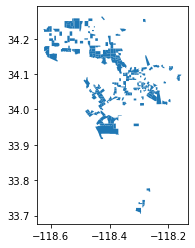

In [55]:
grand_db.plot()

In [56]:
grand_db.to_file("Data/Grand_Gdf.geojson", driver='GeoJSON')

<AxesSubplot:>

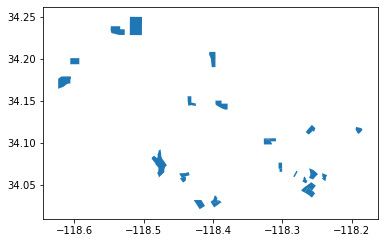

In [57]:
grand_db[grand_db['listing count']>50].plot()

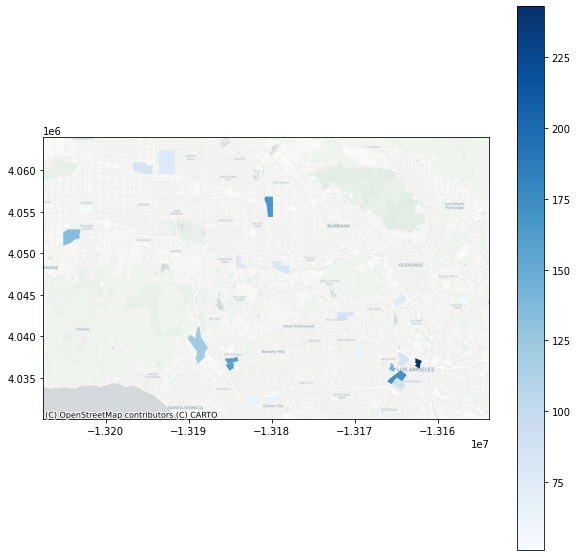

In [65]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))


grand_db[grand_db['listing count']>50].to_crs('EPSG:3857').plot(column = 'listing count',
              ax=ax,
              legend = True,
              cmap = 'Blues')

ctx.add_basemap(ax=ax,source=ctx.providers.CartoDB.Positron)


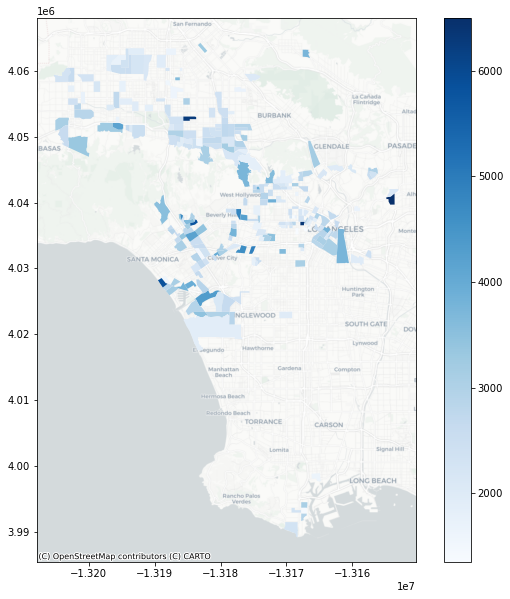

In [62]:
fig, ax = plt.subplots(figsize=(10,10))


grand_db.to_crs('EPSG:3857').plot(column = 'avg price',
              ax=ax,
              legend = True,
              cmap = 'Blues')

ctx.add_basemap(ax=ax,source=ctx.providers.CartoDB.Positron)
